**Fachprojekt Dokumentenanalyse** *WS 22/23* -- *Philipp Oberdiek, Gernot A. Fink* -- *Technische Universität Dortmund, Lehrstuhl XII, Mustererkennung in eingebetteten Systemen*
---
# Einführung in NumPy/Scipy und Matplotlib

In diesen Einführungsaufgaben sollen Sie sich mit den grundlegenden Eigenschaften und Funktionen von *NumPy/SciPy* und *matplotlib* vertraut machen. Die Aufgaben sind dazu gedacht, Ihnen den Einstieg zu erleichtern.

Sehr grosse Datenmengen lassen sich iterativ nicht effizient in Python verarbeiten. Dazu gibt es mit NumPy / SciPy eine Bibliothek, mit der numerische Berechnungen vektorisiert effizient durchgefuehrt werden können.
Vektorisiert bedeutet dabei, dass Operationen auf großen Datenmengen direkt mit einzelnen Methodenaufrufen durchgeführt werden und nicht über Schleifen in Python Code umgesetzt werden.

**ACHTUNG:** Diese Form der Programmierung unterscheidet sich DEUTLICH von dem was sie vielleicht aus C / C++ oder auch Java gewohnt sind.

Zuerst importieren wir die benötigten Module.

In [54]:
%load_ext autoreload
%autoreload 2

import numpy as np
import sys
# Uebergeordneten Ordner zum Pfad hinzufuegen, damit das common Package importiert werden kann
if '..' not in sys.path:
    sys.path.append('..')

from common.python_intro_functions import RandomArrayGenerator, bar_plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## NumPy/Scipy

---
### Initialisierung

Die elementare Datenstruktur ist das [`ndarray`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html). Ein neues ndarray erstellt man zum Beispiel aus einer Python Liste. 

In [55]:
rand_list = [1, 3, 5, 2, 7, 4, 9, 0, 6]
rand_arr = np.array(rand_list)
print(type(rand_arr))

<class 'numpy.ndarray'>


Ein Array, welches mit Nullen gefüllt ist, erstellt man mit der [`zeros()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) Funktion.

Eine fortlaufende Sequenz (analog zu `range()`) kann mit der [`arange()`](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) Funktion erstellt werden.

In [56]:
zeros_arr = np.zeros((3, 3))
print(zeros_arr)

seq_arr = np.arange(100).reshape(10, 10)
print(seq_arr.shape)
print(seq_arr)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(10, 10)
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]


---
### Zugriffsfunktionen und Slicing
Im folgenden schauen wir uns Zugriffsfunktionen für ndarrays an. Hierbei sind besonders [indirekte Addressierung und Slicing](https://numpy.org/doc/stable/reference/arrays.indexing.html) wichtige Themen.

(1) Geben Sie die obere (3, 2) Matrix aus.

In [57]:
seq_arr[:3,:2]

array([[ 0,  1],
       [10, 11],
       [20, 21]])

(2) Geben Sie die untere (3, 3) Matrix aus.

In [58]:
seq_arr[-3:,:2]

array([[70, 71],
       [80, 81],
       [90, 91]])

(3) Geben Sie die 4. Zeile aus.

In [59]:
seq_arr[3]
print(seq_arr)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]


(4) Geben Sie jede ungerade Spalte aus, also Spalten 1, 3, ... Verwenden sie dabei slicing mit step=2.

In [60]:
seq_arr[: ,1::2] # 1::2 means we start from the index 1 for each column and we have a step of 2

array([[ 1,  3,  5,  7,  9],
       [11, 13, 15, 17, 19],
       [21, 23, 25, 27, 29],
       [31, 33, 35, 37, 39],
       [41, 43, 45, 47, 49],
       [51, 53, 55, 57, 59],
       [61, 63, 65, 67, 69],
       [71, 73, 75, 77, 79],
       [81, 83, 85, 87, 89],
       [91, 93, 95, 97, 99]])

(5) Geben Sie die Spalten mit Index 2, 3, 6, 7 aus.

In [61]:
np.take(seq_arr , [2,3,6,7] , axis=1)

array([[ 2,  3,  6,  7],
       [12, 13, 16, 17],
       [22, 23, 26, 27],
       [32, 33, 36, 37],
       [42, 43, 46, 47],
       [52, 53, 56, 57],
       [62, 63, 66, 67],
       [72, 73, 76, 77],
       [82, 83, 86, 87],
       [92, 93, 96, 97]])

---
### Boolean Indexing

Setzen Sie nun alle ungeraden Elemente des ndarray `seq_arr` auf 0 und geben Sie das Ergebnis aus.

In [62]:
seq_arr_copy = seq_arr.copy()
masked = np.putmask(seq_arr_copy , seq_arr % 2 == 1 , 0)
seq_arr_copy

array([[ 0,  0,  2,  0,  4,  0,  6,  0,  8,  0],
       [10,  0, 12,  0, 14,  0, 16,  0, 18,  0],
       [20,  0, 22,  0, 24,  0, 26,  0, 28,  0],
       [30,  0, 32,  0, 34,  0, 36,  0, 38,  0],
       [40,  0, 42,  0, 44,  0, 46,  0, 48,  0],
       [50,  0, 52,  0, 54,  0, 56,  0, 58,  0],
       [60,  0, 62,  0, 64,  0, 66,  0, 68,  0],
       [70,  0, 72,  0, 74,  0, 76,  0, 78,  0],
       [80,  0, 82,  0, 84,  0, 86,  0, 88,  0],
       [90,  0, 92,  0, 94,  0, 96,  0, 98,  0]])

---
### Mathematische Operation

Numpy ermöglicht mit wenig Code viele Operationen gleichzeitig (bzw. sehr performant) zu berechnen, ohne dass Sie dazu eine Schleife in Python verwenden müssen.  
Dies können beispielsweise Operationen sein, die für die Elemente zweier Vektoren paarweise angewendet werden. Zudem ist es häufig empfehlenswert sich zu überlegen, ob Operationen auch als Vektor- oder Matrixmultiplikation formuliert werden können.

Verwenden Sie dazu die Operatoren `+`, `*`  und [`np.dot`](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) in geeigneter Weise.

(1) Geben Sie die elementweise Summe der ersten beiden Zeilen aus.

In [63]:
print(seq_arr[0])
print( seq_arr[1])
print(seq_arr[0] + seq_arr[1])

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[10 12 14 16 18 20 22 24 26 28]


(2) Geben Sie das elementweise Produkt der ersten beiden Zeilen aus.

In [69]:
print(seq_arr[0])
print( seq_arr[1])
print(seq_arr[0] * seq_arr[1])

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[  0  11  24  39  56  75  96 119 144 171]


(3) Geben Sie das Skalarprodukt der ersten beiden Zeilen aus.

In [72]:
print(seq_arr[0])
print( seq_arr[1])
print(np.dot(seq_arr[0] , seq_arr[1]))

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
735


(4) Berechnen Sie eine gewichtete Summe zwischen dem Eingabevektor $x$ und den Gewichten $w$. Sie können zuerst die Summe in einer Schleife berechnen.
Berechnen Sie anschließend dieselbe gewichtete Summe, ohne eine Schleife zu verwenden.

In [75]:
x = np.arange(5)
w = np.asarray([1.0, 2.0, 1.5, 0.5, 4.2])
print("x",x)
print("w",w)
sum = 0
for num , weight in zip(x,w):
	sum += num * weight 
print("sum" , sum)
print("weighted sum" , np.dot(x,w))


x [0 1 2 3 4]
w [1.  2.  1.5 0.5 4.2]
sum 23.3
weighted sum 23.3


(5) Statt einer einzelnen Vektors $x$ als Eingabe sollen nun die Gewichteten Summen für mehrere Eingaben $X$ (einzelne Eingaben in Zeilen) berechnen. Das Ergebnis soll nun ein Vektor mit den gewichteten Summen sein. Verwenden Sie keine Schleifen.

In [79]:
X = np.arange(20).reshape((4, 5))
w = np.asarray([1.0, 2.0, 1.5, 0.5, 4.2])
print(np.dot(X, w ,))


[ 23.3  69.3 115.3 161.3]


(6) Als letzte Erweiterung dieser Berechnung nehmen wir nun an, dass die Gewichtete Summe nicht nur für mehrere Eingaben gleichzeitg berechnet werden soll, sondern auch für mehrere Gewichtungen. Jetzt haben Sie also die Eingabematrix $X$ mit Zeilenweise vorliegenden Beispielen. In der Matrix $W$ liegen die Gewichte ebenfalls zeilenweise vor. Berechnen Sie nun die gewichteten Summen für jede Kombination von Eingaben und Gewichten. Verwenden Sie auch hier keine Schleife!

In [100]:
print("X" , X)
W = np.asarray([[1.0, 2.0, 1.5, 0.5, 4.2],
                [0.5, 3.0, 1.2, 1.3, 0.2],
                [3.5, 4.3, 2.7, 3.1, 0.2]])

print()
print("W" , W)
print()
print("W transposed" , W.T)
print()
print("outer" , np.dot(X,W.T))

X [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]

W [[1.  2.  1.5 0.5 4.2]
 [0.5 3.  1.2 1.3 0.2]
 [3.5 4.3 2.7 3.1 0.2]]

W transposed [[1.  0.5 3.5]
 [2.  3.  4.3]
 [1.5 1.2 2.7]
 [0.5 1.3 3.1]
 [4.2 0.2 0.2]]

outer [[ 23.3  10.1  19.8]
 [ 69.3  41.1  88.8]
 [115.3  72.1 157.8]
 [161.3 103.1 226.8]]


---
### Wichtige Funktionen

Nun schauen wir uns noch einige wichtige NumPy Funktionen an.

(1) Bestimmen Sie in dem ndarray `seq_arr` in jeder Zeile das größte Element
und seinen Index. Geben Sie die Ergebnisse aus.

Hinweis: Achten Sie dabei auf die korrekte Wahl des *axis*-Arguments!

Nützliche Funktionen:
- [`np.max` / `np.amax`](https://numpy.org/doc/stable/reference/generated/numpy.amax.html)
- [`np.argmax`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html)

In [106]:
print("seq_arr" ,seq_arr )
print()
print("max" , np.max(seq_arr , axis = 1))
print()
print("max index" , np.argmax(seq_arr , axis = 1))

seq_arr [[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]

max [ 9 19 29 39 49 59 69 79 89 99]

max index [9 9 9 9 9 9 9 9 9 9]


(2) Bestimmen Sie die Summe und den Mittelwert entlang jeder Zeile.

Nützliche Funktionen:
- [`np.sum`](https://numpy.org/doc/stable/reference/generated/numpy.sum.html)
- [`np.mean`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)

In [107]:
print("seq_arr" ,seq_arr )
print()
print("sum" , np.sum(seq_arr , axis = 1))
print()
print("mean" , np.mean(seq_arr , axis = 1))

seq_arr [[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]

sum [ 45 145 245 345 445 545 645 745 845 945]

mean [ 4.5 14.5 24.5 34.5 44.5 54.5 64.5 74.5 84.5 94.5]


---
## Matplotlib

Häufig kann es sehr hilfreich sein, Daten und deren Verteilung zu visualisieren. Hierfür bietet sich die Verwendung der Bibliothek matplotlib an.

In Kombination mit JupyterLab oder Jupyter Notebooks können mit Hilfe von Magic Commands [verschiedene Backends für matplotlib](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib) gewählt werden. Für JupyterLab empfiehlt sich die Verwendung von `%matplotlib widget` (erfordert das [ipympl](https://jupyter-tutorial.readthedocs.io/de/latest/workspace/jupyter/ipywidgets/libs/ipympl.html) package).

Hinweis: Normalerweise würde man diese Imports ebenfalls am Anfang des Skripts platzieren.


In [108]:
import matplotlib.pyplot as plt

%matplotlib widget

Zunächst schauen wir uns noch ein etwas komplexeres Beispiel für NumPy Funktionen an und visualisieren die Ergebnisse mit matplotlib. 

Die folgenden Arrays enthalten normalverteilte und gleichverteilte Zufallszahlen.

In [151]:
rand_arr_gen = RandomArrayGenerator()
rand_arr_gauss = rand_arr_gen.rand_gauss(arr_shape=(50000,), mean=50, std_deviation=10)
rand_arr_unif = rand_arr_gen.rand_uniform(arr_shape=(10000, 50), min_elem=0.5, max_elem=10.5)

Runden Sie die Elemente der Arrays (ganzzahlig) und erstellen sie jeweils Histogramme. Um das Histogramm für `rand_arr_unif` zu erstellen, linearisieren Sie die Matrix zunächst. (Verwenden Sie `reshape` mit shape Parameter -1.)

Plotten Sie die Ergebnisse mit matplotlib. Erstellen Sie dazu eine neue Figure inkl. Axis und verwenden Sie dazu die Methode `bar_plot` aus dem Modul [`common.python_intro_functions`](../common/python_intro_functions.py) um darin zu plotten.

Nützliche Funktionen:
- [`np.around`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.around.html)
- [`np.bincount`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.bincount.html)
- [`np.reshape`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)
- [`plt.subplots`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)

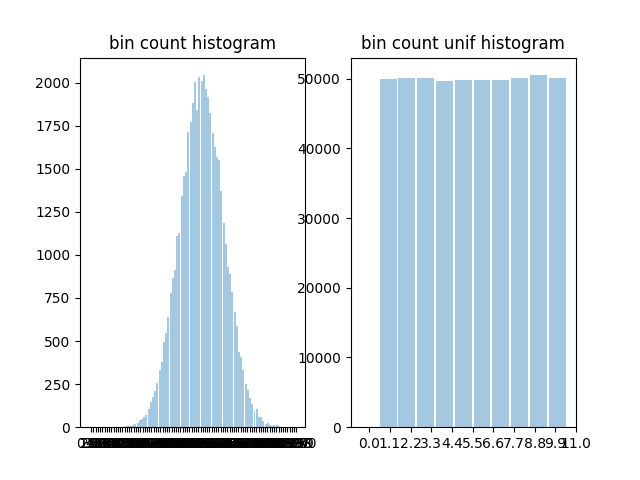

In [157]:
rounded = np.rint(rand_arr_gauss).astype(np.int64)
unif_linearized = rand_arr_unif.reshape(-1)
rounded_unif  = np.rint(unif_linearized).astype(np.int64)
bincount = np.bincount(rounded)
bincount_unif = np.bincount(rounded_unif)
fig, ax = plt.subplots(ncols=2 , )
bar_plot(ax[0] , np.arange(bincount.shape[0]), bincount , title="bin count histogram")
bar_plot(ax[1] , np.arange(bincount_unif.shape[0]), bincount_unif , title="bin count unif histogram")


Bilden Sie nun die zeilenweisen Summen über das ndarray mit den gleichverteilten Zufallszahlen 
(`rand_arr_unif`). Berechnen und visualisieren Sie das Histogramm wie zuvor. Erklären Sie das Ergebnis.